### Manage Region JSON Data

In [96]:
import os
import json
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Write json to file
def WriteJSON(obj,filename):
    try:
        with open(filename, 'w') as outfile:
            obj_json = json.dumps(obj, sort_keys=True, indent=4,default=str)
            outfile.write(obj_json)
    except Exception as e:
        print(e)
        print('File not written.')

# Read and return json object from file. If none, return empty object.
def ReadJSON(filename):
    try: 
        with open(filename, 'r') as infile:
            obj = json.load(infile)
    except Exception as e: 
        obj = [] 
    return obj

### Initialize JSON

In [3]:
def InitJSON(filename):
    
    init_file = "../datasets/pantograph/init_region_data.json"
    obj = ReadJSON(init_file)
    
    WriteJSON(obj,filename)

In [4]:
sets = ['train','test','val']
folder = sets[1]

filename = "../datasets/pantograph/"+folder+"/region_data.json"

InitJSON(filename)

### Update Local File Paths

In [12]:
'''
Relable image path to local dir
'''

def UpdatePaths(filename):
    
    obj = ReadJSON(filename)

    for i in obj['images']:

        path = os.getcwd().replace('/dev','')
        path = path+"/"+"/".join(i['path'].split("/")[5:])
        i['path'] = path
#         print(path)

    WriteJSON(obj,filename)

In [11]:
# Update filepaths for all 3
sets = ['train','test','val']

for folder in sets:
    filename = "../datasets/pantograph/"+folder+"/region_data.json"
    UpdatePaths(filename)

/Users/jessedecker/projects/rail_segmentation/datasets/pantograph/val/swin_to_padd_frame_220500.jpg


### Delete Images & Annotations 

In [7]:
# Delete images and annotations

def ClearJSON(filename):
    obj = ReadJSON(filename)

    # Clear all images
    obj['images'] = []
    len(obj['images'])

    # Clear all annotations
    obj['annotations'] = []
    len(obj['annotations'])
    
    WriteJSON(obj,filename)

In [5]:
sets = ['train','test','val']
folder = sets[2]

filename = "../datasets/pantograph/"+folder+"/region_data.json"

# ClearJSON(filename)

### Read & Write to JSON

In [82]:
# Read in original

sets = ['train','test','val']
folder = sets[0]
filename = "../datasets/pantograph/"+folder+"/region_data.json"
obj = ReadJSON(filename)

print(obj.keys())

len(obj)

dict_keys(['annotations', 'categories', 'images'])


3

In [81]:
# Write updated

filename = "../datasets/pantograph/"+folder+"/region_data.json"
WriteJSON(obj,filename)

In [65]:
obj['annotations'][0]['category_id'] = 1

#### Manage Categories

In [4]:
obj['categories']

[{'color': '#ff0000',
  'id': 1,
  'keypoints': ['L1', 'L2', 'L3', 'R1', 'R2', 'R3'],
  'name': 'front_bar',
  'skeleton': [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]],
  'supercategory': ''},
 {'color': '#00ff00',
  'id': 2,
  'keypoints': ['L1', 'L2', 'L3', 'R1', 'R2', 'R3'],
  'name': 'middle_bar',
  'skeleton': [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]],
  'supercategory': ''},
 {'color': '#0000ff',
  'id': 3,
  'keypoints': ['L1', 'L2', 'L3', 'R1', 'R2', 'R3'],
  'name': 'rear_bar',
  'skeleton': [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]],
  'supercategory': ''}]

In [ ]:
obj['categories'][0].keys()

In [ ]:
'''
Corrections
'''

obj['categories'][0]['color'] = '#ff0000'
obj['categories'][1]['color'] = '#00ff00'
obj['categories'][2]['color'] = '#0000ff'

for i in range(0,len(obj['categories'])):
    del obj['categories'][i]['creator']
    del obj['categories'][i]['metadata']

In [ ]:
'''
add keypoints
'''

for i in range(0,len(obj['categories'])):
    obj['categories'][i]['keypoints'] = ['L1','L2','L3','R1','R2','R3']
    obj['categories'][i]['skeleton'] = [[0,1],[1,2],[2,3],[3,4],[4,5]]

#### Manage Images

In [16]:
len(obj['images'])

160

In [6]:
obj['images'][154]

{'category_ids': [1, 2, 3],
 'file_name': 'padd_to_swin_frame_242768.jpg',
 'height': 1080,
 'id': 154,
 'num_annotations': 3,
 'path': '/Users/jessedecker/projects/rail_segmentation/datasets/pantograph/train/padd_to_swin_frame_242768.jpg',
 'width': 1920}

In [ ]:
for i in range(0,len(obj['images'])):
    del obj['images'][i]['annotated']
    del obj['images'][i]['annotating']
    del obj['images'][i]['dataset_id']
    del obj['images'][i]['events']
    del obj['images'][i]['is_modified']
    del obj['images'][i]['metadata']
    del obj['images'][i]['milliseconds']
    del obj['images'][i]['regenerate_thumbnail']

In [4]:
os.getcwd().replace('/dev','')

'/Users/jessedecker/projects/rail_segmentation'

In [30]:
obj['images'] = obj['images'][:154]
len(obj['images'])

154

In [31]:
obj['images'][-1]

{'category_ids': [1, 2, 3],
 'file_name': 'padd_to_swin_frame_242768.jpg',
 'height': 1080,
 'id': 153,
 'num_annotations': 3,
 'path': '/Users/jessedecker/projects/rail_segmentation/datasets/pantograph/train/padd_to_swin_frame_242768.jpg',
 'width': 1920}

In [6]:
# Clear all images
obj['images'] = []
len(obj['images'])

0

In [54]:
for img in obj['images']:
#     if img['num_annotations'] < 3:
    if len(img['category_ids']) != img['num_annotations']:
#     if img['file_name'] =='swin_to_padd_frame_7830.jpg':
        print(img['id'])

#### Manage Annotations

In [44]:
len(obj['annotations'])

561

In [43]:
colors = [[255, 0, 0],[0, 255, 0],[0, 0, 255]]
category_ids = [1,2,3]

for category_id in category_ids:

    mt_anno = obj['annotations'][0]

    mt_anno['bbox'] = []
    mt_anno['keypoints'] = []
    mt_anno['segmentation'] = []

    mt_anno['num_keypoints'] = 0
    
    mt_anno['category_id'] = category_id
    mt_anno['color'] = colors[category_id-1]
    mt_anno['id'] = len(obj['annotations'])+category_id-1
    mt_anno['image_id'] = 178

    print(mt_anno)
    obj['annotations'].append(mt_anno)

{'area': 5463.6864, 'bbox': [], 'category_id': 1, 'color': [255, 0, 0], 'id': 558, 'image_id': 178, 'iscrowd': 0, 'keypoints': [], 'num_keypoints': 0, 'segmentation': []}
{'area': 5463.6864, 'bbox': [], 'category_id': 2, 'color': [0, 255, 0], 'id': 560, 'image_id': 178, 'iscrowd': 0, 'keypoints': [], 'num_keypoints': 0, 'segmentation': []}
{'area': 5463.6864, 'bbox': [], 'category_id': 3, 'color': [0, 0, 255], 'id': 562, 'image_id': 178, 'iscrowd': 0, 'keypoints': [], 'num_keypoints': 0, 'segmentation': []}


In [10]:
list(map(lambda x:x['image_id']==154,obj['annotations']))

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [ ]:
for anno in obj['annotations']:
    if anno['id'] > 462:
        anno['id'] += 1

# set anno and id for 463
anno['id']

In [ ]:
obj['annotations'][0].keys()

In [ ]:
'''
Drop unneeded columns
'''

for i in range(0,len(obj['annotations'])):
    del obj['annotations'][i]['creator']
    del obj['annotations'][i]['dataset_id']
    del obj['annotations'][i]['isbbox']
    del obj['annotations'][i]['events']
    del obj['annotations'][i]['metadata']
    del obj['annotations'][i]['milliseconds']
    del obj['annotations'][i]['height']
    del obj['annotations'][i]['width']

In [ ]:
'''
Add  empty values to existing
'''

for i in range(0,len(obj['annotations'])):
    obj['annotations'][i]['keypoints'] = []
    obj['annotations'][i]['num_keypoints'] = 0

In [76]:
# t = obj['annotations'][0:558]
# t[-1]
u = obj['annotations'][561:]
# u[0]

obj['annotations'] =t+u
len(obj['annotations'])

597

In [80]:
for i,anno in enumerate(obj['annotations']):
    if i > 557:
        print(i,anno['id'])
        anno['id'] = i
        print(i,anno['id'])
        print()
        

558 561
558 558

559 562
559 559

560 563
560 560

561 564
561 561

562 565
562 562

563 566
563 563

564 567
564 564

565 568
565 565

566 569
566 566

567 570
567 567

568 571
568 568

569 572
569 569

570 573
570 570

571 574
571 571

572 575
572 572

573 576
573 573

574 577
574 574

575 578
575 575

576 579
576 576

577 580
577 577

578 581
578 578

579 582
579 579

580 583
580 580

581 584
581 581

582 585
582 582

583 586
583 583

584 587
584 584

585 588
585 585

586 589
586 586

587 590
587 587

588 591
588 588

589 592
589 589

590 593
590 590

591 594
591 591

592 595
592 592

593 596
593 593

594 597
594 594

595 598
595 595

596 599
596 596



In [49]:
len(obj['annotations'])

570

In [70]:
for anno in obj['annotations']:
    if len(anno['keypoints']) < 18:
#     if anno['num_keypoints'] < 6:
        print(anno['id'],anno['image_id'])

562 178
562 178
562 178


In [8]:
# Clear all annotations

obj['annotations'] = []
len(obj['annotations'])

0

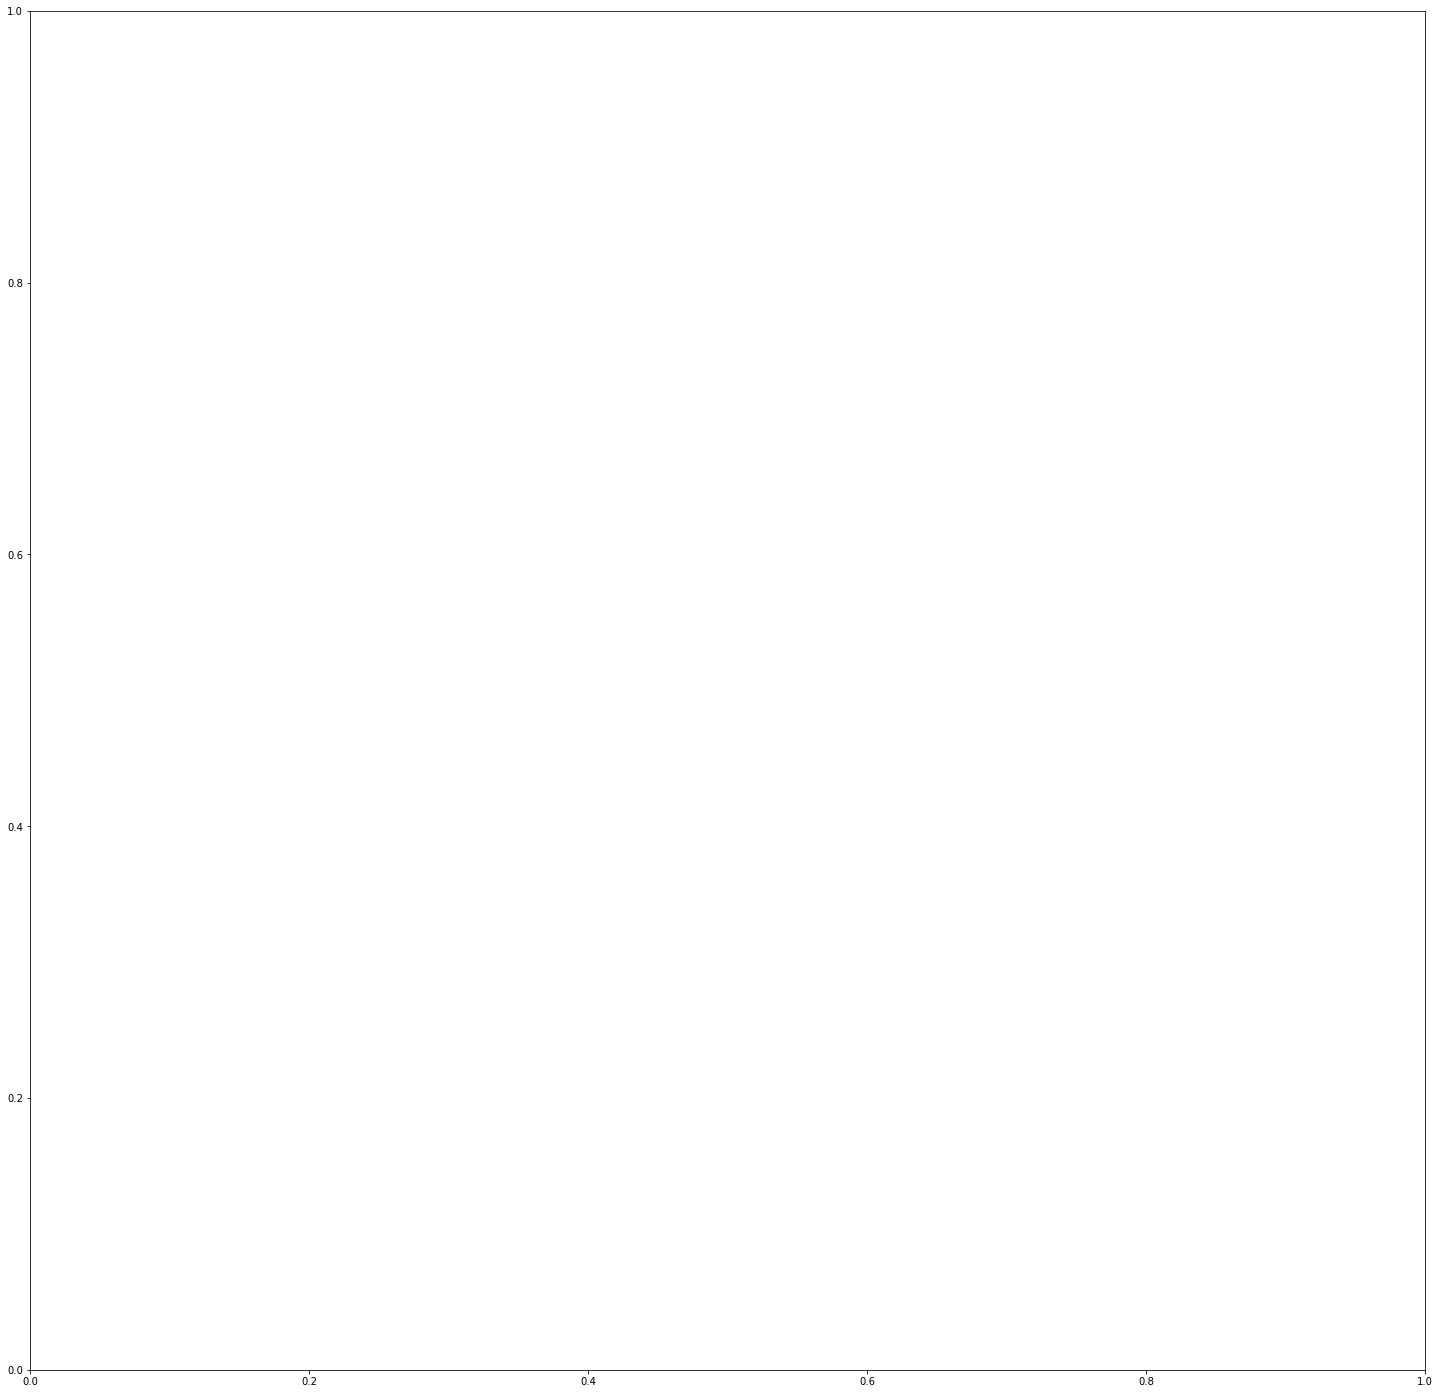

In [99]:
figsize = [25,25]
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot()

# Validate keypoint in mask
for anno in obj['annotations'][:1]:
    kp = anno['keypoints']
    masks = anno['segmentation']
    
    
    for mask in masks:
        # Create np array
        m = np.array(mask)
        # Reshape
        m = m.reshape(int(len(mask)/2),2)
        mask = m

        # Get X/Y list pairs
        x = [i[0] for i in mask]
        y = [i[1] for i in mask]

        # Create patch
        poly = plt.Polygon(mask,closed=True,color='r',alpha=.3)
        
    
#     # get each kp set
#     a = np.array(kp)
#     # print(a.shape)
#     a = a.reshape(6,3)
#     # print(a.shape)
#     prev = []
#     for x in range(0, a.shape[0]):
#         pnt = list(a[x])
    
        



In [6]:
mask = obj['annotations'][0]['segmentation'][0]

In [8]:
import numpy as np

In [17]:
# Create np array
a = np.array(mask)
# Reshape
a = a.reshape(int(len(mask)/2),2)
# for x in range(0, a.shape[0]):
#     print(a[x][0],a[x][1])

mask = a
# for x in a:
#     print(x)

# Get X/Y list pairs
x = [i[0] for i in mask]
y = [i[1] for i in mask]
x

[397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419,
 420,
 421,
 422,
 423,
 424,
 425,
 426,
 427,
 428,
 429,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 450,
 451,
 452,
 453,
 454,
 455,
 456,
 457,
 458,
 459,
 460,
 461,
 462,
 463,
 464,
 465,
 466,
 467,
 468,
 469,
 470,
 471,
 472,
 473,
 474,
 475,
 476,
 477,
 478,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 502,
 503,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 531,
 532,
 533,
 534,
 535,
 536,
 537,
 538,
 539,
 540,
 541,
 542,
 543,
 544,
 545,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563

### Convert COCO format to model format - UNUSED

In [38]:
# Read in original

sets = ['train','test','val']
folder = sets[2]
filename = "../datasets/pantograph/"+folder+"/via_region_data.json"
obj = ReadJSON(filename)

print(obj.keys())

len(obj)

dict_keys(['padd_to_swin_frame_104182.jpg', 'padd_to_swin_frame_215562.jpg', 'padd_to_swin_frame_237838.jpg', 'padd_to_swin_frame_37354.jpg', 'swin_to_padd_frame_130516.jpg', 'swin_to_padd_frame_220500.jpg', 'swin_to_padd_frame_242996.jpg', 'swin_to_padd_frame_96772.jpg'])


8

In [35]:


collector = {}
for i in obj['images']:
    instance = {
        'fileref':"",
        'size':-1,
        'filename':i['file_name'],
        'base64_img_data':"",
        'file_attributes':{},
        'regions' : []
    }
    
    # Find each annotation
    for j in obj['annotations']:
        if i['id'] == j['image_id']:
#             print('match')
            for mask in j['segmentation']:
                
                X = []
                Y =  []
                for k in range(0,len(mask)):
                    if k%2 == 0:
                        X.append(mask[k])
                    else:
                        Y.append(mask[k])
                
                tmp = {}
                tmp['shape_attributes'] = {
                    'name':'polygon',
                    'all_points_x':X,
                    'all_points_y':Y
                }
                tmp['region_attributes'] = {}
                instance['regions'].append(tmp)
    
    instance['size'] = len(X)*len(Y)
    collector[i['file_name']] = instance
#     collector.append(instance)
#     print(i['file_name'])
# print(X)
# print()
# print(Y)

# for c in collector:
#     print(c)